In [1]:
import numpy as np

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# 미국금리
fedfunds_trin_o = pd.read_csv('FEDFUNDS.csv')
fedfunds_trin_o.head(1)
fedfunds_trin_o = fedfunds_trin_o.drop(['DATE'], axis=1)

fedfunds_trin_o.shape

(239, 1)

In [22]:
# 국고채금리
gbond_trin_o = pd.read_csv('GBOND.csv')
gbond_trin_o.head(1)
gbond_trin_o = gbond_trin_o.drop(['DATE'], axis=1)

gbond_trin_o.shape

(239, 1)

In [23]:
# 제조업 재고율
ir_trin_o = pd.read_csv('ISRATIO.csv')
ir_trin_o.head(1)
ir_trin_o = ir_trin_o.drop(['DATE'], axis=1)

ir_trin_o.shape

(239, 1)

In [24]:
# 미국 M2
m2_trin_o = pd.read_csv('M2.csv')
m2_trin_o.head(1)
m2_trin_o = m2_trin_o.drop(['DATE'], axis=1)

m2_trin_o.shape

(239, 1)

In [25]:
# 한국 M2K
m2k_trin_o = pd.read_csv('M2K.csv')
m2k_trin_o.head(1)
m2k_trin_o = m2k_trin_o.drop(['DATE'], axis=1)

m2k_trin_o.shape

(239, 1)

In [54]:
# 한국 실업률
nj_trin_o = pd.read_csv('NJ.csv')
nj_trin_o.head(1)
nj_trin_o = nj_trin_o.drop(['DATE'], axis=1)

nj_trin_o.shape

(239, 1)

In [55]:
# 코스피
kospi_trin_o = pd.read_csv('KOSPI.csv')
kospi_trin_o.head(1)

kospi_date_or = np.array(kospi_trin_o)
kospi_date_o = kospi_trin_o.drop(['DATE'], axis=1)

kospi_date_o.shape

(239, 1)

In [56]:
x_train = np.concatenate((fedfunds_trin_o, gbond_trin_o, ir_trin_o, m2_trin_o, m2k_trin_o, nj_trin_o), axis=1)
y_train = np.array(kospi_date_o)

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units = 1)
])

In [58]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00015), loss='mse')

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 52)                364       
_________________________________________________________________
dropout_2 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_10 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 27        
Total params: 3,498
Trainable params: 3,498
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(
    x_train, y_train, 
    epochs = 10000, 
    batch_size=200,
    verbose=0
)

In [62]:
x_train_o = np.concatenate((fedfunds_trin_o, gbond_trin_o, ir_trin_o, m2_trin_o, m2k_trin_o,nj_trin_o), axis=1)
# 결과도출
result = model.predict(x_train_o)

In [63]:
result.shape

(239, 1)

In [64]:
#np.delete(result,1,1)
kospi_date = (kospi_date_or.T)[0]

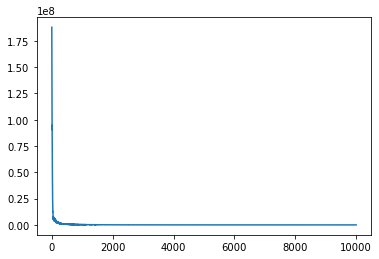

In [65]:
plt.plot(history.history['loss'])
plt.show()

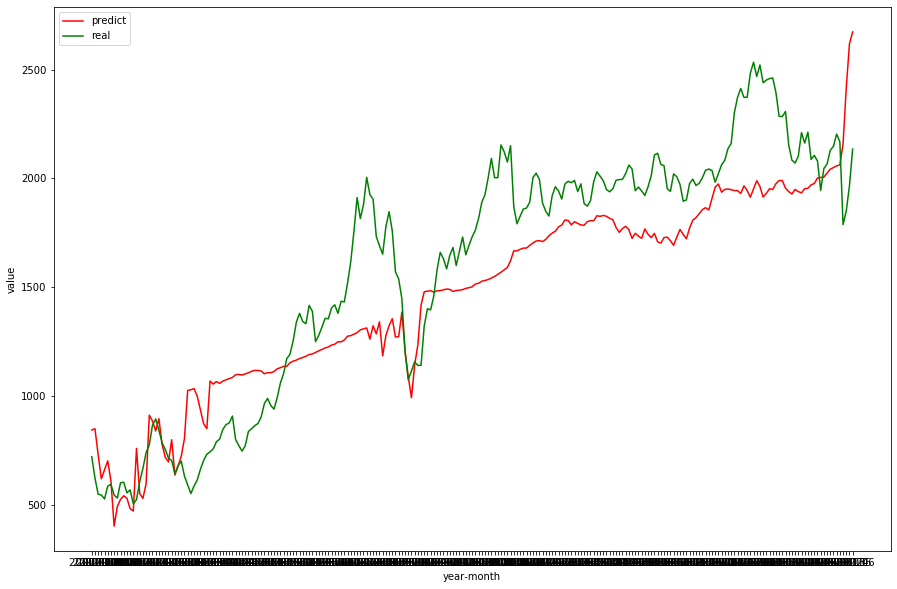

In [66]:
plt.figure(figsize=(15,10))
plt.plot(kospi_date, result, 'r', label='predict')
plt.plot(kospi_date, y_train, 'g', label='real')
plt.xlabel('year-month')
plt.ylabel('value')
plt.legend()
plt.show()

In [67]:
y_train, result

(array([[ 720.35],
        [ 622.92],
        [ 548.07],
        [ 544.09],
        [ 526.36],
        [ 585.02],
        [ 593.4 ],
        [ 543.89],
        [ 530.27],
        [ 600.73],
        [ 602.93],
        [ 554.11],
        [ 567.65],
        [ 504.04],
        [ 523.27],
        [ 604.92],
        [ 665.95],
        [ 738.99],
        [ 774.42],
        [ 864.66],
        [ 894.03],
        [ 842.23],
        [ 784.3 ],
        [ 753.67],
        [ 713.23],
        [ 703.  ],
        [ 642.22],
        [ 679.73],
        [ 699.84],
        [ 630.98],
        [ 591.56],
        [ 550.75],
        [ 585.88],
        [ 613.49],
        [ 663.17],
        [ 703.53],
        [ 731.65],
        [ 742.29],
        [ 756.45],
        [ 789.05],
        [ 801.18],
        [ 845.53],
        [ 867.45],
        [ 875.58],
        [ 907.14],
        [ 798.79],
        [ 771.61],
        [ 746.07],
        [ 770.31],
        [ 835.92],
        [ 849.11],
        [ 863.1 ],
        [ 87